# Snapchat Review Data Visualisation

Data source : https://www.kaggle.com/databar/10k-snapchat-reviews

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
#pip install git+ssh://git@github.com/Sukicsj/preprocess_suki123.git

In [3]:
import preprocess_suki123 as pp

In [4]:
df = pd.read_csv('Snapchat_app_store_reviews.csv')

In [5]:
df

,Unnamed: 0,userName,rating,review,isEdited,date,title
0,0,Savvanananahhh,4,For the most part I quite enjoy Snapchat it’s ...,False,10/4/20 6:01,Performance issues
1,1,Idek 9-101112,3,"I’m sorry to say it, but something is definite...",False,10/14/20 2:13,What happened?
2,2,William Quintana,3,Snapchat update ruined my story organization! ...,False,7/31/20 19:54,STORY ORGANIZATION RUINED!
3,3,an gonna be unkown😏,5,I really love the app for how long i have been...,False,4/22/21 14:10,The app is great
4,4,gzhangziqi,1,This is super frustrating. I was in the middle...,False,10/2/20 13:58,"Locked me out, customer service not helping"
...,...,...,...,...,...,...,...
9555,9555,geekygirl17,1,I used to love using Snapchat and now I hardly...,False,6/24/19 0:58,Major issue...not that it will get fixed
9556,9556,changemaker kkdd,2,"Well, I did deleted it because there was some ...",False,6/23/19 13:42,I got then deleted it.
9557,9557,teekay2much,4,Every time I upload a photo or video to my sto...,False,6/3/19 3:35,Story problem
9558,9558,whoratheexplora,4,"Love this app, but since he update I can’t upl...",False,6/3/19 3:26,Bugs


In [6]:
df['rating'].value_counts()

4    2346
3    2171
5    1932
1    1879
2    1232
Name: rating, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9560 entries, 0 to 9559
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  9560 non-null   int64 
 1   userName    9560 non-null   object
 2   rating      9560 non-null   int64 
 3   review      9560 non-null   object
 4   isEdited    9560 non-null   bool  
 5   date        9560 non-null   object
 6   title       9560 non-null   object
dtypes: bool(1), int64(2), object(4)
memory usage: 457.6+ KB


In [8]:
df.duplicated().sum()

0

In [9]:
df['date'] = pd.to_datetime(df['date'])

In [10]:
df['year'] = pd.DatetimeIndex(df['date']).year

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9560 entries, 0 to 9559
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  9560 non-null   int64         
 1   userName    9560 non-null   object        
 2   rating      9560 non-null   int64         
 3   review      9560 non-null   object        
 4   isEdited    9560 non-null   bool          
 5   date        9560 non-null   datetime64[ns]
 6   title       9560 non-null   object        
 7   year        9560 non-null   int64         
dtypes: bool(1), datetime64[ns](1), int64(3), object(3)
memory usage: 532.3+ KB


## Snapchat rating over the years

In [12]:
import seaborn as sns

In [13]:
rating = df.groupby('year').rating.mean().reset_index()

In [14]:
rating

,year,rating
0,2019,3.325434
1,2020,3.046331
2,2021,2.950316


The overall app rating has dropped slightly from 3.33 to 2.95.  

In [15]:
base_color = sns.color_palette()[1]

C:\Users\Suki\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


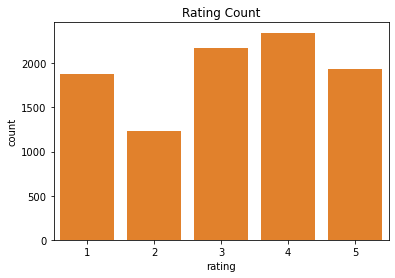

In [16]:
sns.countplot(df['rating'], color=base_color)
plt.xlabel('rating')
plt.title('Rating Count');

Most of the snapchat users rated the app at 4. 

In [18]:
df['rating'].describe()

count    9560.000000
mean        3.127615
std         1.397407
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: rating, dtype: float64

The average rating of the app is 3.13.

## Text Preprocessing

In [19]:
df['review'] = df['review'].apply(lambda x: pp.get_cont_exp(x))
df['review'] = df['review'].apply(lambda x: pp.remove_accented_chars(x))
df['review'] = df['review'].apply(lambda x: pp.remove_emails(x))
df['review'] = df['review'].apply(lambda x: pp.remove_html_tags(x))
df['review'] = df['review'].apply(lambda x: pp.remove_special_chars(x))
df['review'] = df['review'].apply(lambda x: pp.remove_urls(x))
df['review'] = df['review'].apply(lambda x: pp.make_to_base(x))

In [20]:
#lowercase conversion
df['review'] = df['review'].apply(lambda x: str(x).lower())

## Wordcloud

In [21]:
from wordcloud import WordCloud
from nltk.corpus import stopwords
import nltk
nltk.download("stopwords")
chachedWords = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Suki\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [22]:
text = ' '.join(df['review'])

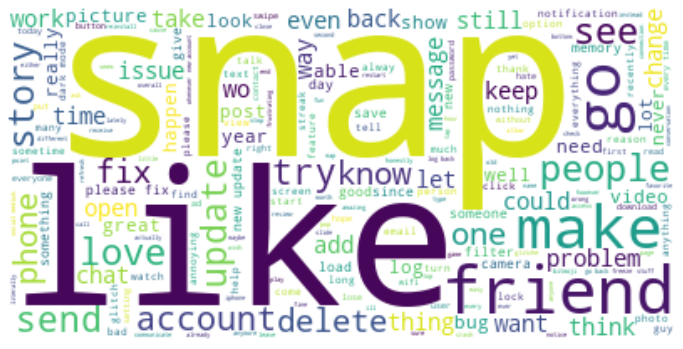

In [23]:
# Create stopword list:
stopwords = set(chachedWords)
stopwords.update(["snapchat", "ca", "nt", "say", "ve", 'also', 'app','use', 'would', 'get'])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=[12,12])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Common words from Wordcloud 
- like
- snap 
- send 
- people
- friend
- make
- story 
- delete
- account
- fix 
- update

From the above wordcloud, we can see that some of the common words `love`, `like`, `snap`, `friend`, `make`. This shows that snapchat users have quite positive experience with the app. 

However, there are some negative words like `problem`, `delete`, `issue`, `delete`, `fix`.